In [1]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

folder_path = '/content/drive/MyDrive/Satria Data pt 2/Semifinal/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## data tcode balance

### Import data

In [2]:
df_train_index = pd.read_pickle(folder_path + 'Dataset/dav/df_train_index.pkl')

In [3]:
import pickle

with open(folder_path + 'Dataset_Part2/surya/Graf_Fitur/degree_centrality.pkl', 'rb') as f:
    degree_centrality = pickle.load(f)

with open(folder_path + 'Dataset_Part2/surya/Graf_Fitur/eigenvector_centrality.pkl', 'rb') as f:
    eigenvector_centrality = pickle.load(f)

with open(folder_path + 'Dataset_Part2/surya/Graf_Fitur/pagerank.pkl', 'rb') as f:
    pagerank = pickle.load(f)

with open(folder_path + 'Dataset_Part2/surya/Graf_Fitur/num_neighbors_list.pkl', 'rb') as f:
    num_neighbors_list = pickle.load(f)

with open(folder_path + 'Dataset_Part2/surya/Graf_Fitur/total_appearance_count_list.pkl', 'rb') as f:
    total_appearance_count_list = pickle.load(f)

In [4]:
# Create DataFrame
df_graf = pd.DataFrame({
    'degree_centrality': degree_centrality.values(),
    'eigenvector_centrality': eigenvector_centrality.values(),
    'pagerank': pagerank.values(),
    'num_neighbors_list': num_neighbors_list,
    'total_appearance_count_list': total_appearance_count_list
})

df_graf['index_value'] = df_graf.index
df_graf

,degree_centrality,eigenvector_centrality,pagerank,num_neighbors_list,total_appearance_count_list,index_value
0,0.0,3.166712e-33,3.865186e-07,0,0,0
1,0.0,3.166712e-33,3.865186e-07,0,0,1
2,0.0,3.166712e-33,3.865186e-07,0,0,2
3,0.0,3.166712e-33,3.865186e-07,0,0,3
4,0.0,3.166712e-33,3.865186e-07,0,0,4
...,...,...,...,...,...,...
2161194,0.0,3.166712e-33,3.865186e-07,0,0,2161194
2161195,0.0,3.166712e-33,3.865186e-07,0,0,2161195
2161196,0.0,3.166712e-33,3.865186e-07,0,0,2161196
2161197,0.0,3.166712e-33,3.865186e-07,0,0,2161197


In [5]:
import pandas as pd


df_train = pd.merge(df_train_index, df_graf, on='index_value', how='left')
df_train

,index_value,label,degree_centrality,eigenvector_centrality,pagerank,num_neighbors_list,total_appearance_count_list
0,1020690,1,0.000000e+00,3.166712e-33,3.865186e-07,0,0
1,237394,0,1.850825e-06,3.394179e-22,7.180145e-07,4,4
2,1307960,1,9.716833e-06,3.266378e-16,1.422943e-06,21,34
3,596500,1,0.000000e+00,3.166712e-33,3.865186e-07,0,0
4,1496986,0,0.000000e+00,3.166712e-33,3.865186e-07,0,0
...,...,...,...,...,...,...,...
5995,621985,0,4.627063e-07,5.188342e-29,7.798188e-07,1,1
5996,1565897,0,0.000000e+00,3.166712e-33,3.865186e-07,0,0
5997,1660666,0,0.000000e+00,3.166712e-33,3.865186e-07,0,0
5998,234059,0,2.313532e-06,3.834393e-19,5.296871e-07,5,5


### Preprocess Features

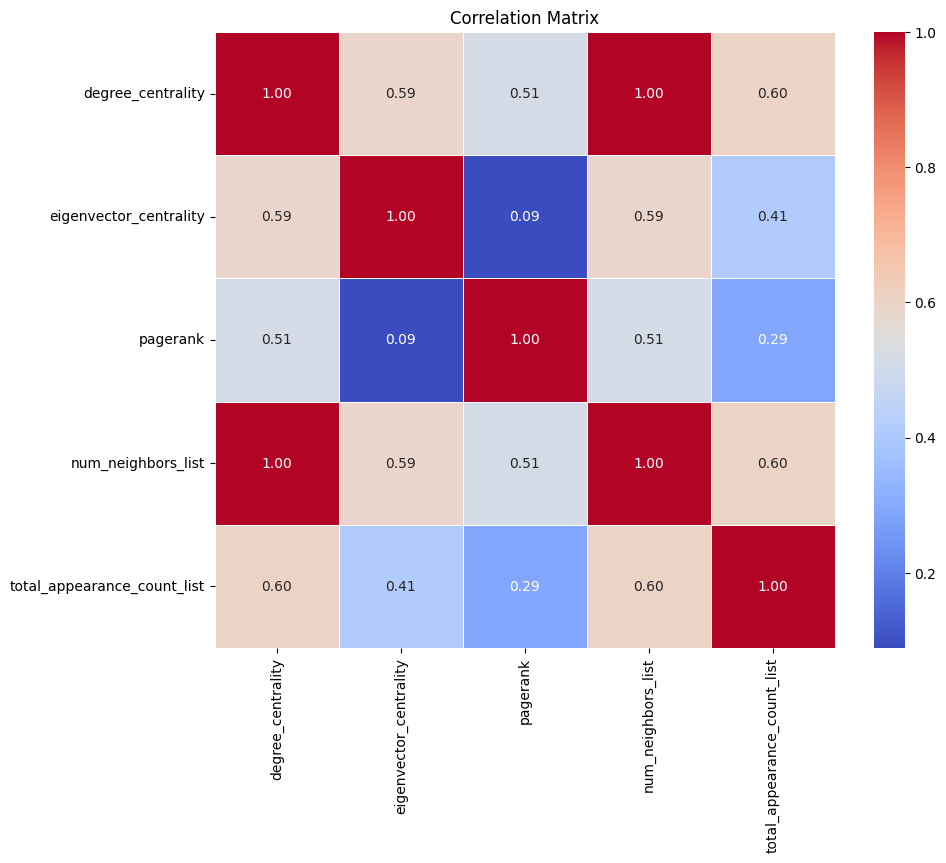

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df_train[['degree_centrality', 'eigenvector_centrality', 'pagerank', 'num_neighbors_list', 'total_appearance_count_list']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [11]:
# df_train.to_pickle('/content/drive/MyDrive/Satria Data pt 2/Semifinal/Dataset/dav/df_train_graf.pkl')

In [8]:
# Perform one-hot encoding on categorical variable 'category'
temp_df = df_train[['degree_centrality', 'eigenvector_centrality', 'pagerank', 'total_appearance_count_list', 'label']]

y = temp_df['label']
X = temp_df.drop('label', axis=1)

In [9]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


### Model XBG

In [10]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = xgb_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.5241666666666667
Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.93      0.66       600
           1       0.63      0.12      0.20       600

    accuracy                           0.52      1200
   macro avg       0.57      0.52      0.43      1200
weighted avg       0.57      0.52      0.43      1200



In [ ]:
# Method 1: Using feature_importances_ attribute
feature_importances_xgb = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': xgb_model.feature_importances_
})

# Sort the features by importance
feature_importances_xgb = feature_importances_xgb.sort_values(by='Importance', ascending=False)
print(feature_importances_xgb)

            Feature  Importance
6          tcode_rt    0.502177
4  combined_flw_lst    0.211107
2           sts_cnt    0.180285
1           frn_cnt    0.029946
0      num_retweets    0.027417
3  appearance_count    0.026744
5       tcode_reply    0.022323


### Predict Data

In [ ]:
result_df = pd.read_pickle('/content/drive/MyDrive/Satria Data pt 2/Semifinal/Dataset/dav/result_df_clean.pkl')

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


temp_df = result_df[['flw_cnt', 'lst_cnt']]
# Standardize and pca the data
scaled_data = scaler.transform(temp_df)
combined_flw_lst = pca.transform(scaled_data)

print(pca.explained_variance_ratio_)

[0.97503353]


In [ ]:
result_df['combined_flw_lst'] = combined_flw_lst
result_df.head()

,content,created_at,username,tcode,num_retweets,frn_cnt,flw_cnt,sts_cnt,loc,lst_cnt,lang,appearance_count,nama_re,combined_flw_lst
0,,2024-01-31 17:26:28+00:00,@be9+Qm5EsBY7VLxMEGgBlOYaT0KrMsiQQLzN5iG2hOY=,reply,36,696.150781,1543.289555,14114.732016,-,1.757412,id,9411,-,-0.061760
1,!,2024-01-29 16:57:00+00:00,@JVWxyA2fM/S2B0bN/n/buYbHxNqUC91UUX6ShBzub+I=,reply,0,327.000000,208.666667,11230.333333,-,0.000000,id,3,-,-0.068192
2,! deretan pesohor dan selebriti yang dukung ga...,2024-01-30 02:03:42+00:00,@7jB3OiFFcymo1DxD4GO8wR2tuWnQLk+nRHfZmLs1iHo=,mention,0,28.000000,2.000000,75.000000,Indonesia,0.000000,id,1,-,-0.068585
3,!! iya pakk salah strategii next nya di perbai...,2024-01-07 15:57:19+00:00,@CDJsmOeil3IHVzBWFKLBs21n0Q2nBvRird0Wb9yxync=,reply,0,2.000000,2.000000,234.000000,-,0.000000,id,1,-,-0.068585
4,!! katanya sudah dikembalikan oleh !!,2024-01-19 04:19:17+00:00,@X4DJ8WnurWZZIm9IizCEzcdSPvFwGF1pnHnLk1YMgWk=,reply,0,1347.000000,1390.000000,60962.000000,-,0.000000,id,1,-,-0.065945


In [ ]:
temp_df = result_df[['tcode', 'num_retweets', 'frn_cnt', 'sts_cnt', 'appearance_count', 'combined_flw_lst']]
result_df_encoded = pd.get_dummies(temp_df, columns=['tcode'], drop_first=True)

X_test = result_df_encoded.astype(float)

In [ ]:
predictions = xgb_model.predict(X_test)
result_df['predicted_buzzer'] = predictions

In [ ]:
import pickle

# Save the trained model to a file
with open('/content/drive/MyDrive/Satria Data pt 2/Semifinal/Predictons/pred_xgb.pkl', 'wb') as file:
    pickle.dump(predictions, file)

##### Cek Predictions

In [ ]:
result_df.loc[result_df['predicted_buzzer'] == 1].sample(100, random_state=42)

,content,created_at,username,tcode,num_retweets,frn_cnt,flw_cnt,sts_cnt,loc,lst_cnt,lang,appearance_count,nama_re,combined_flw_lst,predicted_buzzer
532676,"ganjar pranowo dan mahfud md, melalui kebijaka...",2024-01-07 12:21:12+00:00,@4Eivnw+YApNl97SQoP0UGdnzKH4dFoxgOuTKMDz+MU4=,mention,0,25.0,31.0,1165.0,Pontianak,0.0,id,1,-,-0.068530,1
1688699,salut dengan langkah-langkah positif ganjar-ma...,2024-01-12 08:45:31+00:00,@gnZ+cQUW6qTPskWw8RlxRh+DodGW8Vhpz+HLOoEkWLI=,mention,0,95.0,13.0,1335.0,"Bontang, Indonesia",0.0,id,1,-,-0.068564,1
760372,jadi tanyakan ke said abdullah kenapa kok stru...,2024-01-03 14:37:55+00:00,@EXEffpyysnwmxZuZPqnKKHKOcm6gvSwd+eGvhG0isek=,reply,0,98.0,28.0,33418.0,-,0.0,id,1,-,-0.068536,1
1036434,"makinn yakinn deh milih prabowo-gibran inii, g...",2024-01-20 12:24:22+00:00,@Y6bC8yfRQd1m+HdC82QWTS/H3s3RcSM1pgla1ljoe7g=,reply,0,20.0,22.0,707.0,-,0.0,id,1,-,-0.068547,1
1444172,program makan siang dan susu gratis dari prabo...,2024-01-09 02:43:22+00:00,@R6zFTrrQ2poRkDj9gZYOFRrbeFVgXm/tt2c4XHdDyXI=,mention,0,65.8,45.6,2321.8,-,0.0,id,5,-,-0.068502,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406472,dukungan penuh warga jatim bagi ganjar-mahfud ...,2024-01-02 07:11:44+00:00,@Tf0qmxOOhpAYmacAOVLzNI7AieHwaKfBR7IwXl3Rggs=,mention,0,3.0,3.0,1161.0,Madiun,0.0,id,1,-,-0.068583,1
847517,karakter prabowo gibran yg melanggar etika atu...,2024-01-01 13:26:58+00:00,@wrbkXlUThu/h5YvnFf4USNiC/wP5P5HbWFQN9SdoILo=,reply,0,135.0,16.0,1086.0,"Mojosari, Mojokerto, Jatim",0.0,id,1,-,-0.068559,1
1229013,"pak anies, penjelasan jelas, runut, dan respect",2024-01-07 14:47:56+00:00,@Vljz0/tlqvUY1HSCqQtMtkbR1op/KyCm41TxWXTXBPA=,reply,0,204.0,17.0,1907.0,"Cikampek, Indonesia",0.0,id,1,-,-0.068557,1
687526,heran padahal cuma angkut logistik bantuan tp ...,2024-01-18 12:35:04+00:00,@vDoc0vveTvi7sy12PTdaQwzFDGTIV580ZH5Wy734jb0=,reply,0,29.0,17.0,2076.0,-,0.0,id,1,-,-0.068557,1


In [ ]:
result_df.loc[result_df['predicted_buzzer'] == 0].sample(100, random_state=42)

,content,created_at,username,tcode,num_retweets,frn_cnt,flw_cnt,sts_cnt,loc,lst_cnt,lang,appearance_count,nama_re,combined_flw_lst,predicted_buzzer
1898937,"terima kasih, pak anies, karena anda adalah pe...",2024-01-31 12:59:09+00:00,@OGvUg4pnoVJ/NAuXKS7pSUbfM7LYmbtPq44twrZhfyo=,reply,0,104.0,105.0,3068.0,-,0.0,id,1,-,-0.068389,0
1408367,prabowo tidak tergoyahkan oleh serangan pribad...,2024-01-12 06:38:39+00:00,@MLKVU+DwPKR6VkTj5+0Yx3QnW56AdHqLFvsQtqIRItQ=,mention,0,50.0,35.0,35.0,"Blora, Indonesia",0.0,id,1,-,-0.068523,0
119363,anies muhaimin dan ganjar mahfud memang 1 puta...,2024-01-13 08:38:01+00:00,@5QyUYAY/L5Kp10+zqiHgLjYKy6UWPm0gOmEDndoSXNo=,mention,0,575.0,666.0,59655.0,-,0.0,id,1,-,-0.067322,0
271628,bukti pasangan ganjar mahfud menjadi pilihan r...,2024-01-06 19:05:55+00:00,@3bHdgZH8F6bvGLeiShLAeTnrKT2ED9WRZzhpFeEuaQw=,mention,0,4.0,1.0,157.0,-,0.0,id,1,-,-0.068587,0
1247489,"pak ganjar mentioned rich brian, karina and th...",2024-01-07 14:43:24+00:00,@EMGjKgpD/KFaJkZ9t5lV+ultYRP0xPYYIWcFfuok6KQ=,mention,0,485.0,347.0,18775.0,-,1.0,id,1,-,-0.065714,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316538,dah putus urat malunya.....,2024-01-17 14:21:46+00:00,@1pCPXIwQ37njK38heWklwZBmKDKMHpdcO9DlLBZM7Qc=,reply,1,2583.0,1844.0,18949.0,-,1.0,id,1,-,-0.062866,0
343556,debat kemarin juga membuktikan pak ganjar sang...,2024-01-29 06:43:45+00:00,@WXWcY1RwMMqBqgVgYIHKpFUpFV/nsCsXR3xBAitmUzA=,reply,0,3.0,1.0,593.0,-,0.0,id,1,-,-0.068587,0
123227,anies rocks debat capres ð¥ð¥ð¥ #debatca...,2024-01-07 13:24:12+00:00,@3Xt2Y6EOGK2xTOCAYZqkCvDzNVWuqK4QV5BeT6X6VR0=,mention,0,558.0,328.0,74432.0,A bit Salty and Savage ð,3.0,id,1,-,-0.061319,0
1192230,"oke nih, kamukita pbowogbran mengutamakan mela...",2024-01-25 12:56:34+00:00,@KSNx7cAMLiDxI+pKlEgVja9s1RWeR6rLFzYSzpGtf4A=,mention,0,56.0,3439.0,163.0,-,0.0,id,1,-,-0.062047,0


In [ ]:
result_df.loc[result_df['predicted_buzzer'] == 0].shape

(1405678, 15)

In [ ]:
result_df.loc[result_df['predicted_buzzer'] == 1].shape

(755521, 15)